<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Поставлена задача защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

In [1]:
# Имрорт библиотек
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
def data_info(df):
    """Изучение датасета"""
    display(df.head())
    display(df.info())
    display(df.describe())
    print('Количество дубликатов =', df.duplicated().sum())
    # Построение корреляционной матрицы
    plt.figure(figsize=(10,10))
    corr_matrix = sns.heatmap(df.corr(),annot=True)
    corr_matrix.axes.set_title("Корреляционная матрица", fontsize=16)
    plt.show()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Количество дубликатов = 153


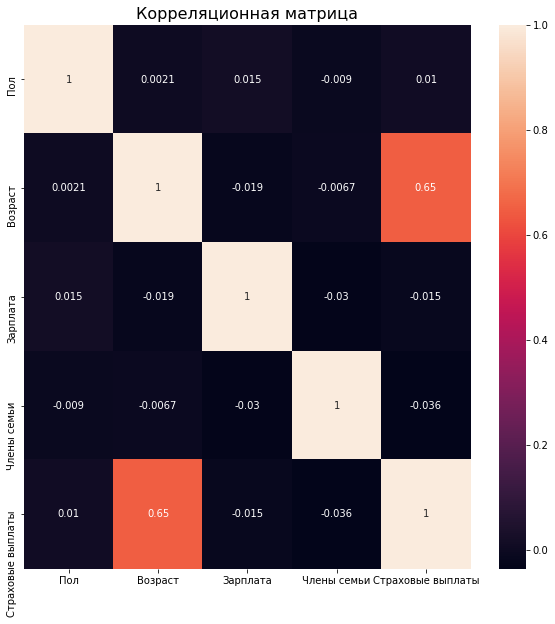

In [4]:
data_info(df)

**Вывод**

Данные загружены и изучены. 

В таблице данных компании соблюден почти идеальный баланс между мужчинами и женщинами. Средний возраст застрахованного составляет около 31 года. Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет. Также интересно взглянуть на уровень заработной платы застрахованных - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний экономический класс, чем слишком бедные или слишком богатые граждане. 
    
Возраст и количество страховых выплат клиенту за последние 5 лет имеют корреляцию 0.65. Вероятно, для компании есть взаимосвязь: чем старше застрахованное лицо, тем более вероятно он потребует страховку чаще, следовательно, несёт в себе больше рисков для предприятия.

Пропусков нет, но есть есть дубликаты. Это могут быть реально совпадающие данные разных клиентов, либо ошибки. Обрабатывать дубликаты необходимости нет, так как на результат данного исследования они повлиять не могут.

## Умножение матриц

**Вопрос:** Изменится ли качество линейной регрессии, если умножить признаки на обратимую матрицу? 

**Ответ:** Не изменится.

**Обоснование:** Для обоснования ответа, рассмотрим как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)
- $y$ — вектор целевого признака
- $P$ — матрица, на которую умножаются признаки
- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)
- $M$ — матрица закодированных признаков
- $E$ — единичная матрица

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**1.** Подставим в формулу $a = Xw $ значения  $w$ из формулы выше:



$$
a = X (X^T X)^{-1} X^T y  
$$

Так вычисляются предсказания для не преобразованных признаков.

**2.** Преобразованные признаки $M$ - это матрица признаков $X$ умноженная на обратимую матрицу $P$: $M = XP$
       
   Для преобразованных признаков формула предсказаний примет вид:
   
$$
a_m = M (M^T M)^{-1} M^T y = XP ((XP)^T (XP))^{-1} (XP)^T y
$$

Для дальнейшего преобразования:

**3.** воспользуемся свойствами матриц: $(AB)^T = A^TB^T$:

$$
a_m = XP (X^TP^TXP)^{-1} X^TP^T y
$$

**4.** воспльзуемся свойствами обратных матриц: $(AB)^{-1} = A^{-1}B^{-1}$:

$$
a_m = XP (X^TX)^{-1} (P^T)^{-1}P^{-1} X^TP^T y
$$

- $E$ - единичная матрица

**5.** Так как $PP^{-1} = E$, а умножение любой матрица на единичную матрицу даёт ту же матрицу $AE=A$:

$$
a_m = XE(X^TX)^{-1} E X^T y = X(X^T X)^{-1} X^T y 
$$

**Вывод**

Таким образом уравнение для предсказаний по преобразованным признакам приобрело вид уравнения предсказаний по не преобразованным признакам.



## Алгоритм преобразования

**Алгоритм**

Исходя из того, что умножение признаков на обратимую матрицу не влияет на результат работы линейной регрессии, алгоритм защиты данных пользователей будет следующий:
1. Преобразуем признаки, содержащие персональные данные клиентов в матрицу;
2. Создадим обратимую матрицу, состоящую из случайных чисел, размер которой по вертикали и горизонтали будет равен количеству признаков. Назовём данную матрицу кодирующей матрицей.
3. Произведём умножение матрицы признаков на кодирующую матрицу.

Таким образом персональные данные клиентов будут закодированны, но на результаты работы линейной регрессии это никак не скажется.

**Обоснование**

Проверим наш алгоритм на простом наборе данных. Пусть матрица признаков $X$ будет размера $2Х4$:

In [5]:
X= np.array([[1, 2],
             [2, 3],
             [3, 4],
             [4, 5]
            ])
X

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5]])

Целевой признак зададим вектором $y$:

In [6]:
y = np.array([1,2,3,4])
y

array([1, 2, 3, 4])

Создадим обратимую(кодирующую) матрицу $P$ размером $2Х2$: 

In [7]:
P = np.random.randint(1,10,(2,2))
P

array([[6, 1],
       [3, 4]])

Умножив матрицу признаков на кодирующую матрицу получим закодированную матрицу $M=XP$

In [8]:
M = X @ P
M

array([[12,  9],
       [21, 14],
       [30, 19],
       [39, 24]])

По формуле линейной регрессии $ a = X (X^T X)^{-1} X^T y$ получим вектор прогнозов для не закодированных признаков:

In [9]:
a = X @ np.linalg.inv(X.T @ X) @ X.T @ y
a

array([1., 2., 3., 4.])

По этой же формуле $ a_m = M (M^T M)^{-1} M^T y$ получим вектор прогнозов для закодированных признаков:

In [10]:
a_m = M @ np.linalg.inv(M.T @ M) @ M.T @ y
a

array([1., 2., 3., 4.])

**Вывод**

Как мы видим, результаты прогноза на закодированных и не закодированных признаках получился идентичным. Осталось применить алгоритм к реальным данным, и проверить результаты.

## Проверка алгоритма

**Создание функции кодирования**

In [11]:
def features_coding(matrix):
    """ Функция приниммает датафрейм признаков, 
        возвращает признаки, закодированные умножением на обратимую матрицу  
    """
    np.random.seed(12345)
    if type(matrix) == pd.core.frame.DataFrame or type(matrix) == pd.core.series.Series:
        matrix = matrix.values
    range_matrix = matrix.shape[1]
    # Создание кодирующей матрицы и проверка её на обратимость
    determinant = 0
    while determinant == 0:
        key_matrix = np.random.randint(1,100,(range_matrix,range_matrix))
        determinant = np.linalg.det(key_matrix)
    return matrix @ key_matrix

**Проверка работы алгоритма МО на незакодированных признаках**

In [12]:
# Выделяем признаки и цели
features = df.drop('Страховые выплаты', axis=1)
targets = df['Страховые выплаты']
# Делим на трейн и тест
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            targets, 
                                                                            test_size = 0.25, 
                                                                            random_state=5555)

In [13]:
lin_regr = LinearRegression()
lin_regr.fit(features_train, target_train)
predictions = lin_regr.predict(features_test)
r2_score(target_test, predictions)

0.4079369370084327

In [14]:
lin_regr.coef_

array([ 1.53008761e-02,  3.64392233e-02, -7.04095938e-07, -1.48906216e-02])

**Проверка работы алгоритма МО на закодированных признаках**


In [15]:
# Кодируем признаки
features_code = features_coding(features)
# Делим на трейн и тест
features_code_train, features_code_test, target_train, target_test = train_test_split(features, 
                                                                                      targets, 
                                                                                      test_size = 0.25, 
                                                                                      random_state=5555)
features_code[0:5]

array([[2977895.,  745477., 4564510., 4017730.],
       [2282006.,  571622., 3497458., 3078103.],
       [1261218.,  316015., 1932870., 1701058.],
       [2503030.,  626259., 3837186., 3377764.],
       [1567275.,  392510., 2402042., 2114193.]])

In [16]:
lin_regr_code = LinearRegression()
lin_regr_code.fit(features_code_train, target_train)
predictions_code = lin_regr_code.predict(features_code_test)
r2_score(target_test, predictions_code)

0.4079369370084327

In [17]:
lin_regr_code.coef_

array([ 1.53008761e-02,  3.64392233e-02, -7.04095938e-07, -1.48906216e-02])

**Вывод**

Как видно из сравнения метрики качества и коэфициентов моделей МО для закодированных и не закодированных данных, на качество работы модели кодирование не сказалось. На реальных данных алгоритм показал свою работоспособность.

**Общий вывод**

На этапе загрузки и изучения данных было выявлено, что критичных проблем в данных нет. В разделе 2 представлено обоснование того, что умножение матрицы признаков на обратимую матрицу не влияет на результат работы линейной регрессии. Далее был определён и обоснован такой алгоритм кодирования данных, который не повлияет на результат работы модели машинного обучения. И в разделе 4 алгоритм реализован на реальных данных. Применение алгоритма на реальных данных показала, что модель линейной регрессии работает одинаково на закодированных и на не закодированных данных. 

Таким образом, задача защититы данные клиентов страховой компании решена. Разработан метод преобразования данных, при котором персональную информацию сложно восстановить, но который не влияет на работу мадели машинного обучения.